In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("./clean_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41286 entries, 0 to 41285
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    41286 non-null  int64  
 1   Views                 41286 non-null  int64  
 2   Price (USD)           41286 non-null  int64  
 3   Space (m^2)           41286 non-null  float64
 4   Number of Rooms       41286 non-null  int64  
 5   Normalized Latitude   41286 non-null  float64
 6   Normalized Longitude  41286 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.2 MB


In [4]:
num_data = data._get_numeric_data()
num_data.columns

Index(['ID', 'Views', 'Price (USD)', 'Space (m^2)', 'Number of Rooms',
       'Normalized Latitude', 'Normalized Longitude'],
      dtype='object')

In [6]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ID,41286.0,0.0,8.522875e+08,20643.500000,20643.50000,11918.385944,1.420479e+08,1.000000,413.850000,2065.25000,4129.500000,10322.25000,20643.50000,30964.750000,37157.500000,39221.75000,40873.150000,4.128600e+04
Views,41286.0,0.0,1.394202e+07,337.693746,107.00000,954.032943,9.101789e+05,0.000000,8.000000,17.00000,23.000000,40.00000,107.00000,315.000000,790.000000,1312.00000,3459.500000,8.093300e+04
Price (USD),41286.0,0.0,3.800869e+09,92061.940367,63000.00000,711009.302503,5.055342e+11,1000.000000,16000.000000,26000.00000,31500.000000,43000.00000,63000.00000,100000.000000,160750.000000,220000.00000,390150.000000,1.000000e+08
Space (m^2),41286.0,0.0,4.950989e+06,119.919318,74.00000,1608.810378,2.588271e+06,1.000000,27.846500,36.06250,42.900000,55.00000,74.00000,104.000000,145.000000,180.00000,280.000000,1.330000e+05
Number of Rooms,41286.0,0.0,1.195590e+05,2.895873,3.00000,1.092604,1.193784e+00,1.000000,1.000000,1.00000,2.000000,2.00000,3.00000,3.000000,4.000000,5.00000,6.000000,9.000000e+00
Normalized Latitude,41286.0,0.0,3.002109e+06,72.714932,72.24121,8.925298,7.966094e+01,-64.085906,56.081285,65.09502,67.108582,70.54409,72.24121,73.311215,78.752489,79.36113,114.161400,5.218059e+02
Normalized Longitude,41286.0,0.0,2.048939e+06,49.627928,76.96196,89.190487,7.954943e+03,-517.013104,-238.629452,-236.39915,47.702860,74.56133,76.96196,79.838354,83.687630,87.21895,98.487329,3.238277e+02


<AxesSubplot:xlabel='ID'>

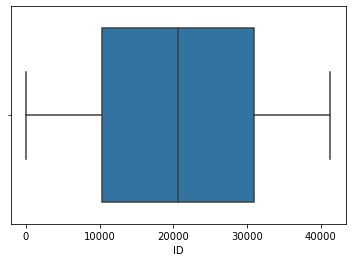

In [23]:
sns.boxplot(x=num_data.ID)

<AxesSubplot:xlabel='Views'>

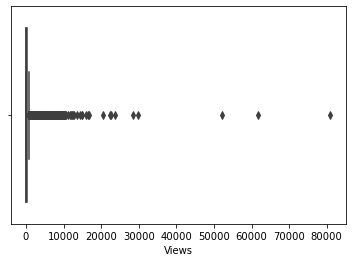

In [25]:
sns.boxplot(x=num_data.Views)

<AxesSubplot:xlabel='Price (USD)'>

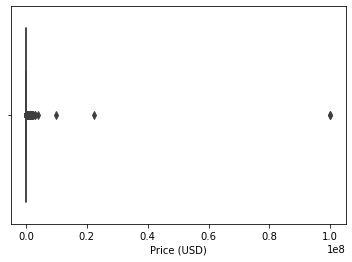

In [26]:
sns.boxplot(x=num_data['Price (USD)'])

<AxesSubplot:xlabel='Space (m^2)'>

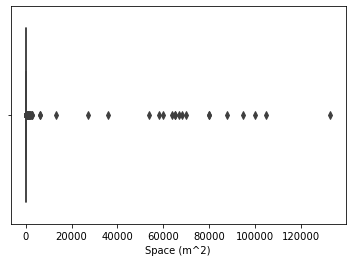

In [27]:
sns.boxplot(x=num_data['Space (m^2)'])

<AxesSubplot:xlabel='Number of Rooms'>

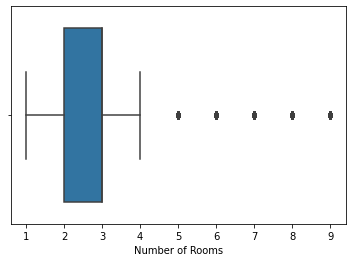

In [28]:
sns.boxplot(x=num_data['Number of Rooms'])

<AxesSubplot:xlabel='Normalized Latitude'>

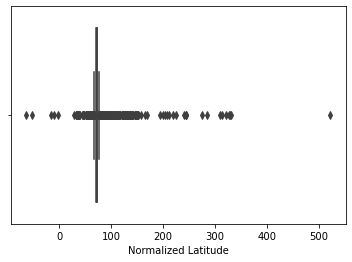

In [29]:
sns.boxplot(x=num_data["Normalized Latitude"])

<AxesSubplot:xlabel='Normalized Longitude'>

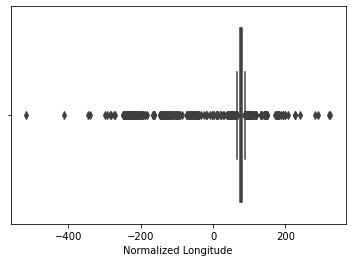

In [30]:
sns.boxplot(x=num_data["Normalized Longitude"])

<AxesSubplot:>

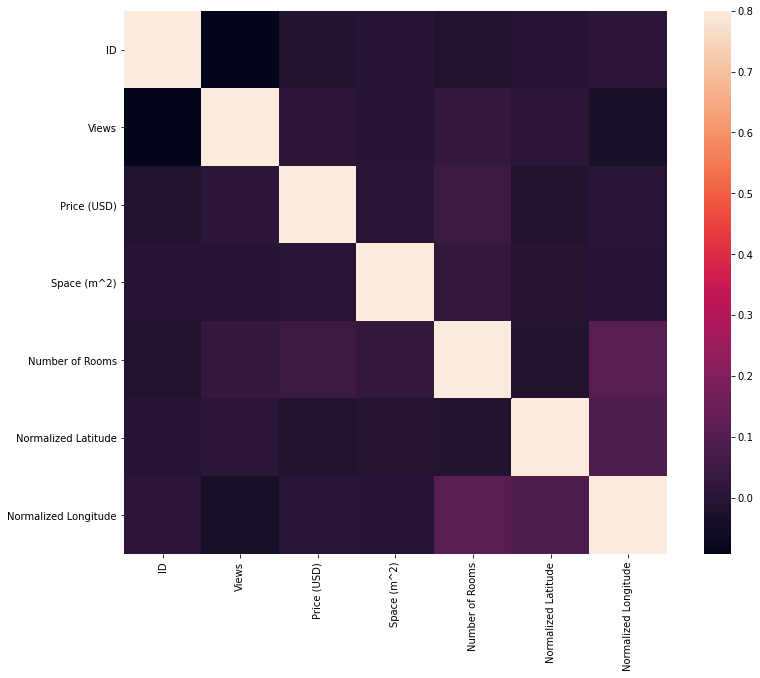

In [31]:
num_corr = num_data.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(num_corr,vmax =.8 ,square = True)